# Match Kitti Sequence version 22-11

Reads a sequence of stereo images as Frame. The Frames are scanned to identify FramePoints that are pixels that are at the top or botrom of vertical lines in the image. A patch is taken around each of the FramePoints in the left hand image, to match these to a patch in the right hand image and estimate the disparity/distance of the framePoint.

A Sequence is created in which the first Frame is the KeyFrame. It's initial FramePoints are culled to keep only the points for which there is a confident estimate of its depth. The consecutive frames are used to track the KeyFrame's remaining FramePoints. Only a limited number of all framePoints will be found in the consecutive frames, mostly because nearby objects become larger quickly as we get closer. The matching FramePoints are given the same FramePointId as the corresponding point in the KeyFrame and its depth is estimated.

The results are dumped into a folder 'dump', containing files 0.txt, 1.txt, etc. 0.txt contains the FramePoints as observed from the first frame, 1.txt form the second frame, etc. In these files, each row contains a single FramePoint with the values FramePointID, X, Y, Depth.

In [1]:
from urb_kitti import *
%matplotlib inline
import numpy as np

Read the first 10 frames from KITTI sequence 00.

In [2]:
%%time
LEFTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_2'
RIGHTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_3'

frame = []
for frameid in range(250):
    filename = '%06d.png'%(frameid)
    left_frame = Frame(LEFTDIR + '/' + filename, RIGHTDIR)
    frame.append(left_frame)

CPU times: user 116 µs, sys: 270 µs, total: 386 µs
Wall time: 392 µs


Inspect the FramePoints for the first frame

We can also manually compute the Depth of the points and show these

Turn the list of frames into a sequence. The first frame is automatically taken as the KeyFrame and its FramePoints are rerieved, depth is estimated, only the most confident points are kept, and they are tracked in the other frames.

In [3]:
seq = create_sequence(frame, confidence_threshold=1.6)

  3% (8 of 250) |                         | Elapsed Time: 0:00:15 ETA:  0:08:03

invalid speed -4.16165723878 -0.604385452587 [[  9.99342715e-01  -1.13788167e-02   3.44188897e-02  -8.57969470e-02]
 [  1.11909082e-02   9.99921433e-01   5.64719186e-03   4.43223297e-01]
 [ -3.44804439e-02  -5.25830142e-03   9.99391540e-01  -8.89545118e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (22 of 250) |##                      | Elapsed Time: 0:00:48 ETA:  0:08:45

invalid speed 1.04790571359 -0.161011331482 [[ 0.99995643 -0.00554496  0.00751009 -0.56106696]
 [ 0.00557138  0.99997835 -0.00350051 -0.00939804]
 [-0.00749051  0.00354219  0.99996567 -1.76077964]
 [ 0.          0.          0.          1.        ]]


 12% (31 of 250) |##                      | Elapsed Time: 0:01:12 ETA:  0:09:26

invalid speed 3.98356739076 -0.410392809881 [[ 0.99990992  0.0030027  -0.01308165  0.01292043]
 [-0.00304227  0.99999085 -0.00300589  0.00188621]
 [ 0.0130725   0.00304541  0.99990991  0.23356182]
 [ 0.          0.          0.          1.        ]]


 14% (36 of 250) |###                     | Elapsed Time: 0:01:21 ETA:  0:07:14

invalid speed 1.66715391462 -0.550999315621 [[ 0.9997216   0.02301265 -0.00521014 -0.06694586]
 [-0.02303395  0.99972642 -0.00406513  0.03033959]
 [ 0.00511517  0.00418401  0.99997816 -2.88676827]
 [ 0.          0.          0.          1.        ]]


 15% (38 of 250) |###                     | Elapsed Time: 0:01:26 ETA:  0:06:35

invalid speed 2.00265682024 0.195482365232 [[  9.99998545e-01  -5.97186317e-04  -1.59808833e-03   3.57725111e-03]
 [  6.09778003e-04   9.99968685e-01   7.89036500e-03  -1.09419746e-03]
 [  1.59332627e-03  -7.89132799e-03   9.99967594e-01  -4.63898823e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (43 of 250) |####                    | Elapsed Time: 0:01:35 ETA:  0:06:15

invalid speed 1.86708110963 -0.632061357983 [[ 0.99991132 -0.01119846  0.00720693 -0.11178389]
 [ 0.01122959  0.99992773 -0.00429339  0.0279717 ]
 [-0.00715833  0.00437394  0.99996481 -3.07703373]
 [ 0.          0.          0.          1.        ]]


 22% (57 of 250) |#####                   | Elapsed Time: 0:01:56 ETA:  0:04:12

invalid speed 1.0589199053 -0.454876904356 [[ 0.99985405 -0.01670483  0.00358117 -0.18578778]
 [ 0.01672005  0.99985112 -0.00426442  0.14132404]
 [-0.0035094   0.00432367  0.99998449 -2.76887022]
 [ 0.          0.          0.          1.        ]]


 24% (61 of 250) |#####                   | Elapsed Time: 0:02:02 ETA:  0:04:26

invalid speed 1.16658755645 -0.523683833654 [[  9.99998707e-01  -3.15428613e-04   1.57696204e-03   1.77426048e-01]
 [  3.31227933e-04   9.99949657e-01  -1.00286313e-02   3.61859377e-01]
 [ -1.57371934e-03   1.00291407e-02   9.99948469e-01  -2.83002482e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 25% (64 of 250) |######                  | Elapsed Time: 0:02:08 ETA:  0:04:37

invalid speed 5.35981225932 -0.258699507094 [[ 0.99976249 -0.02132258  0.0045061  -0.61860933]
 [ 0.02135823  0.99973975 -0.00801657  0.02574196]
 [-0.004334    0.00811091  0.99995771  2.40220744]
 [ 0.          0.          0.          1.        ]]


 28% (70 of 250) |######                  | Elapsed Time: 0:02:16 ETA:  0:04:30

invalid speed 3.00626486851 -0.777705629481 [[  9.99485667e-01  -3.02870293e-02   1.05403149e-02  -7.79552632e-01]
 [  3.02883326e-02   9.99541203e-01   3.59886555e-05   7.19629520e-01]
 [ -1.05365690e-02   2.83278419e-04   9.99944449e-01  -2.79920542e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (93 of 250) |########                | Elapsed Time: 0:02:45 ETA:  0:02:10

invalid speed 0.836890119498 -0.711230096481 [[  9.98572122e-01   2.37198148e-03  -5.33675139e-02   2.23203178e-01]
 [ -2.93802941e-03   9.99940235e-01  -1.05306487e-02   1.76762379e-01]
 [  5.33393459e-02   1.06724075e-02   9.98519411e-01  -4.37825514e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (116 of 250) |##########             | Elapsed Time: 0:03:30 ETA:  0:07:20

invalid speed 1.84170932745 -0.215767194139 [[ 0.94352037  0.05917898 -0.32598645 -0.0265199 ]
 [-0.07065593  0.99722462 -0.023469   -0.00173913]
 [ 0.32369285  0.04517635  0.94508309 -0.005319  ]
 [ 0.          0.          0.          1.        ]]


 47% (119 of 250) |##########             | Elapsed Time: 0:03:46 ETA:  0:08:44

invalid speed 1.00694365398 -0.0527603143044 [[  9.84142138e-01   2.47994269e-02  -1.75639519e-01   9.49854674e-02]
 [ -2.51292231e-02   9.99684151e-01   3.46543076e-04  -8.01753390e-02]
 [  1.75592637e-01   4.07263701e-03   9.84454488e-01  -1.16498542e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 54% (137 of 250) |############           | Elapsed Time: 0:04:45 ETA:  0:04:33

invalid speed -3.17355071388 -0.461716909175 [[  9.97041539e-01   7.87848543e-04  -7.68605760e-02  -5.07492478e-01]
 [ -1.52763554e-03   9.99953071e-01  -9.56673188e-03   8.15732757e-01]
 [  7.68494318e-02   9.65584402e-03   9.96995953e-01  -7.38427667e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (142 of 250) |#############          | Elapsed Time: 0:04:55 ETA:  0:03:15

invalid speed 0.885625857371 -0.447948502111 [[ 0.99598297  0.01468414 -0.0883306   4.62461216]
 [-0.01214909  0.99950066  0.02916908 -2.08957358]
 [ 0.08871481 -0.02797877  0.99566403 -2.59179653]
 [ 0.          0.          0.          1.        ]]


 64% (162 of 250) |##############         | Elapsed Time: 0:05:26 ETA:  0:02:27

invalid speed 0.457079173022 -0.519139681009 [[  9.99955803e-01  -8.45133333e-03  -4.11915840e-03  -1.76068286e-03]
 [  8.45180681e-03   9.99964278e-01   9.75507871e-05  -1.86709112e-01]
 [  4.11818682e-03  -1.32360807e-04   9.99991511e-01  -4.83840581e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 68% (171 of 250) |###############        | Elapsed Time: 0:05:54 ETA:  0:04:08

invalid speed 6.39821447057 -0.546160351609 [[  9.99104611e-01   2.51954050e-02  -3.39877699e-02  -5.72262294e-01]
 [ -2.52056278e-02   9.99682280e-01   1.27720052e-04  -2.74559017e-01]
 [  3.39801893e-02   7.29077385e-04   9.99422241e-01   2.18811344e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (186 of 250) |#################      | Elapsed Time: 0:06:20 ETA:  0:01:48

invalid speed 0.150661338356 -0.444531825326 [[ 0.99996946  0.00672549  0.00398033 -0.49061459]
 [-0.00670081  0.99995844 -0.00618149  0.29817818]
 [-0.00402174  0.00615463  0.99997297 -3.30933001]
 [ 0.          0.          0.          1.        ]]


 89% (223 of 250) |####################   | Elapsed Time: 0:08:03 ETA:  0:00:32

invalid speed 0.326694103203 -0.206653862078 [[ 0.99932665 -0.01596984  0.03303357 -0.00961062]
 [ 0.01585155  0.99986698  0.00383976  0.15787143]
 [-0.03309049 -0.00331354  0.99944687 -1.22841491]
 [ 0.          0.          0.          1.        ]]


 91% (228 of 250) |####################   | Elapsed Time: 0:08:09 ETA:  0:00:23

invalid speed 0.241597754892 -0.449407886604 [[ 0.99974736 -0.01438128 -0.01727429  0.48150229]
 [ 0.01479555  0.99960009  0.02409861 -0.49227121]
 [ 0.01692081 -0.0243481   0.99956033 -2.66293458]
 [ 0.          0.          0.          1.        ]]


 94% (237 of 250) |#####################  | Elapsed Time: 0:08:24 ETA:  0:00:21

invalid speed 0.91975472446 -0.142791980264 [[  9.99970002e-01   7.73101380e-03  -4.75238318e-04   3.94765229e-01]
 [ -7.72238424e-03   9.99841174e-01   1.60621030e-02   2.27894218e-01]
 [  5.99339177e-04  -1.60579512e-02   9.99870883e-01  -1.18376288e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 98% (245 of 250) |###################### | Elapsed Time: 0:08:35 ETA:  0:00:06

invalid speed 0.0256403640426 -0.58799235441 [[ 0.99987628 -0.00764026  0.01374977  0.4013756 ]
 [ 0.007529    0.99993864  0.0081255  -0.21324652]
 [-0.01381101 -0.00802097  0.99987245 -3.93977162]
 [ 0.          0.          0.          1.        ]]


100% (250 of 250) |#######################| Elapsed Time: 0:08:39 Time: 0:08:39


In [15]:
len(seq.keyframes)

58

In [13]:
keyframes_np = keyframes_to_np(seq.keyframes)
mappoints = get_mappoints(seq.keyframes)
mappoints_np = mappoints_to_np(mappoints)
links_np = links_to_np(mappoints)
np.save('mappoints_250_17_1.6_1.6', mappoints_np)
np.save('links_250_17_1.6_1.6', links_np)
np.save('keyframes_250_17_1.6_1.6', keyframes_np)

In [18]:
keyframes_np

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   9.99225888e-01,  -2.42785046e-02,
          3.09544714e-02,  -3.21844139e-01,   2.40421235e-02,
          9.99679049e-01,   7.98592986e-03,   3.21183133e-01,
         -3.11384230e-02,  -7.23553663e-03,   9.99488892e-01,
         -4.73379394e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00],
       [  2.00000000e+00,   9.99803293e-01,   7.21589650e-03,
          1.84744949e-02,   7.37591924e-02,  -7.12380507e-03,
          9.99961895e-01,  -5.04575504e-03,  -2.24967218e-02,
         -1.85102006e-02,   4.91315381e-03,   9.99816600e-01,
         -5.68506286e+00,   0.00000000e+00

In [23]:
import numpy as np
kf = np.load('keyframes_250_17_1.6_1.6.npy')[:,1:]
kf.reshape(kf.shape[0], 4, 4)

array([[[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e+00]],

       [[  9.99225888e-01,  -2.42785046e-02,   3.09544714e-02,
          -3.21844139e-01],
        [  2.40421235e-02,   9.99679049e-01,   7.98592986e-03,
           3.21183133e-01],
        [ -3.11384230e-02,  -7.23553663e-03,   9.99488892e-01,
          -4.73379394e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e+00]],

       [[  9.99803293e-01,   7.21589650e-03,   1.84744949e-02,
           7.37591924e-02],
        [ -7.12380507e-03,   9.99961895e-01,  -5.04575504e-03,
          -2.24967218e-02],
        [ -1.85102006e-02,   4.91315381e-03,   9.99816600e-01,
          -5.68506286e+

Show only the ID's in frame[0] that are actually in frame[1], to avoid clutter in the image.

In [6]:
#kp0 = [kp for kp in frame[0].get_observations() if kp.get_mappoint() in { p.get_mappoint() for p in frame[1].get_observations() }]
#kp1 = [kp for kp in frame[1].get_observations() if kp.has_mappoint()]
#frame[1].compute_depth()
#show2(draw_observations_depth(kp0), draw_observations_depth(kp1))

In [7]:
frame[5].compute_depth()
frame[5].filter_not_useful()
frame[6].compute_depth()
frame[6].filter_not_useful()
obs1 = [o for o in frame[5].get_observations() ]
obs2 = [o for o in frame[6].get_observations() ]

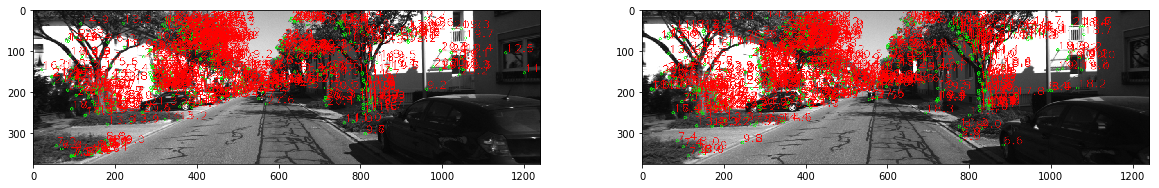

In [8]:
show2(draw_observations_depth(obs1), draw_observations_depth(obs2))

In [9]:
frame[5].compute_depth()
a = [ (o.get_depth(), o.confidence) for o in frame[5].get_observations() if o.confidence is not None and o.confidence > 1.4 ]
len(a)
#show2(draw_frame(frame[5]), draw_frame(frame[5].get_right_frame()))

732

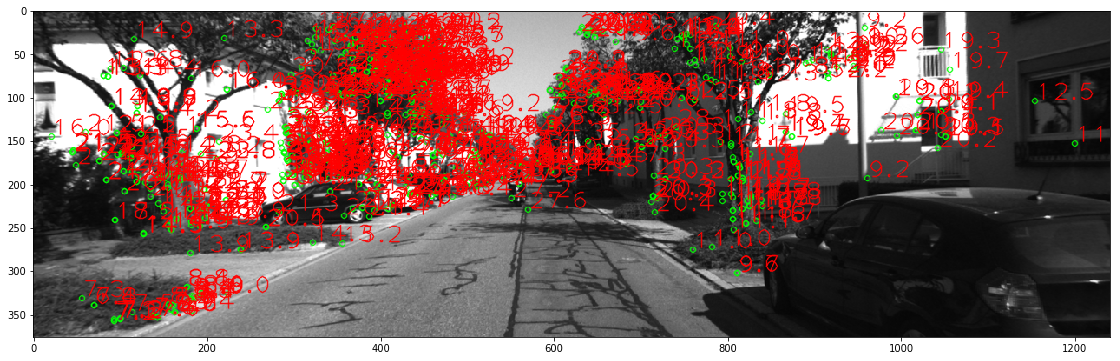

In [10]:
pl = [ o for o in frame[5].get_observations() if o.confidence is not None and o.confidence > 1.4 ]
show(draw_observations_depth(pl))